In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
data = pd.read_csv('/Users/chiragbhattad/Downloads/DDP/dataset.csv')

In [34]:
features = ['YS', 'O2', 'Reheated', 'ac_ferr']
target = ['T27J']
training_data = data[0:40]
test_data = data[40:60]
X_train = training_data[features]
Y_train = training_data[target]
X_test = test_data[features]
Y_test = test_data[target]

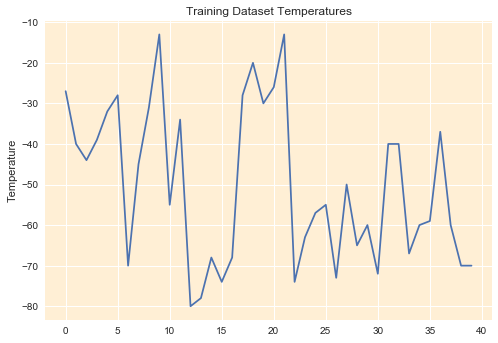

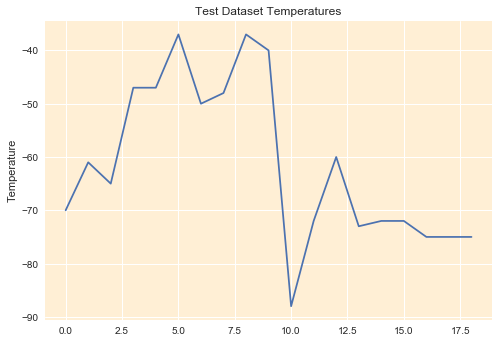

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('#FFEFD5')
plt.plot(range(40), Y_train, label = "Train Data")
plt.title('Training Dataset Temperatures')
plt.ylabel('Temperature')
plt.show()
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('#FFEFD5')
plt.plot(range(19), Y_test, label = "Test Data")
plt.title('Test Dataset Temperatures')
plt.ylabel('Temperature')
plt.show()

In [5]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
pred = regr.predict(X_test)

In [7]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 1.80856913e-03  5.63436380e+02  3.87300599e-02 -2.06848292e-01]]


In [8]:
print('Mean Squared Error: ', mean_squared_error(Y_test, pred))

Mean Squared Error:  70.80621514915913


In [9]:
print('Variance score:', r2_score(Y_test, pred))

Variance score: 0.679356686459188


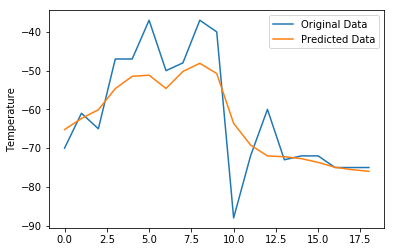

In [10]:
plt.plot(range(19), Y_test, label = "Original Data")
plt.plot(range(19), pred, label = "Predicted Data")
plt.legend(loc='best')
plt.ylabel('Temperature')
plt.show()

In [18]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(training_data[features].as_matrix())

In [20]:
Y_train = scaler.fit_transform(training_data[target].as_matrix())

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [21]:
X_test = scaler.fit_transform(test_data[features].as_matrix())
Y_test = scaler.fit_transform(test_data[target].as_matrix())

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [22]:
Y_test

array([[0.35294118],
       [0.52941176],
       [0.45098039],
       [0.80392157],
       [0.80392157],
       [1.        ],
       [0.74509804],
       [0.78431373],
       [1.        ],
       [0.94117647],
       [0.        ],
       [0.31372549],
       [0.54901961],
       [0.29411765],
       [0.31372549],
       [0.31372549],
       [0.25490196],
       [0.25490196],
       [0.25490196]])

In [23]:
def neural_network(X_data, input_dim):
    W_1 = tf.Variable(tf.random_uniform([input_dim,10]))
    b_1 = tf.Variable(tf.zeros([10]))
    layer_1 = tf.add(tf.matmul(X_data, W_1), b_1)
    layer_1 = tf.nn.relu(layer_1)
    
    W_2 = tf.Variable(tf.random_uniform([10,10]))
    b_2 = tf.Variable(tf.zeros([10]))
    layer_2 = tf.add(tf.matmul(layer_1, W_2), b_2)
    layer_2 = tf.nn.relu(layer_2)
    
    W_0 = tf.Variable(tf.random_uniform([10,1]))
    b_0 = tf.Variable(tf.zeros([1]))
    output = tf.add(tf.matmul(layer_2, W_0), b_0)
    
    return output

In [24]:
xs = tf.placeholder("float")
ys = tf.placeholder("float")

output = neural_network(xs, 4)
cost = tf.reduce_mean(tf.square(output-ys))
train = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

In [25]:
c_t = []
c_test = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    for i in range(100):
        for j in range(X_train.shape[0]):
            sess.run([cost,train], feed_dict = {xs:X_train[j,:].reshape(1,4), ys:Y_train[j]})
        c_t.append(sess.run(cost, feed_dict={xs:X_train, ys: Y_train}))
        c_test.append(sess.run(cost, feed_dict={xs: X_test, ys: Y_test}))
        print('Epoch: ', i, 'Cost: ', c_t[i])
    
    pred = sess.run(output, feed_dict = {xs:X_test})
    print('Cost: ', sess.run(cost, feed_dict={xs: X_test, ys: pred}))
    
print(Y_test)

Epoch:  0 Cost:  0.13828391
Epoch:  1 Cost:  0.11398578
Epoch:  2 Cost:  0.10984639
Epoch:  3 Cost:  0.106292464
Epoch:  4 Cost:  0.10300237
Epoch:  5 Cost:  0.099942654
Epoch:  6 Cost:  0.09709634
Epoch:  7 Cost:  0.094450615
Epoch:  8 Cost:  0.09195666
Epoch:  9 Cost:  0.08963115
Epoch:  10 Cost:  0.08745921
Epoch:  11 Cost:  0.085428305
Epoch:  12 Cost:  0.08352707
Epoch:  13 Cost:  0.08174546
Epoch:  14 Cost:  0.08007403
Epoch:  15 Cost:  0.07850454
Epoch:  16 Cost:  0.077029265
Epoch:  17 Cost:  0.07564139
Epoch:  18 Cost:  0.0743344
Epoch:  19 Cost:  0.07310255
Epoch:  20 Cost:  0.07194047
Epoch:  21 Cost:  0.07084338
Epoch:  22 Cost:  0.069806695
Epoch:  23 Cost:  0.06882634
Epoch:  24 Cost:  0.067899205
Epoch:  25 Cost:  0.06702199
Epoch:  26 Cost:  0.0661918
Epoch:  27 Cost:  0.065404065
Epoch:  28 Cost:  0.06465611
Epoch:  29 Cost:  0.06394528
Epoch:  30 Cost:  0.06326924
Epoch:  31 Cost:  0.06262592
Epoch:  32 Cost:  0.062013112
Epoch:  33 Cost:  0.061429013
Epoch:  34 Cost:

In [26]:
    Y_test = Y_test.reshape(-1,1)
    Y_test = scaler.inverse_transform(Y_test)
    pred = pred.reshape(-1,1)
    pred = scaler.inverse_transform(pred)
    
    Y_test

array([[-70.],
       [-61.],
       [-65.],
       [-47.],
       [-47.],
       [-37.],
       [-50.],
       [-48.],
       [-37.],
       [-40.],
       [-88.],
       [-72.],
       [-60.],
       [-73.],
       [-72.],
       [-72.],
       [-75.],
       [-75.],
       [-75.]])

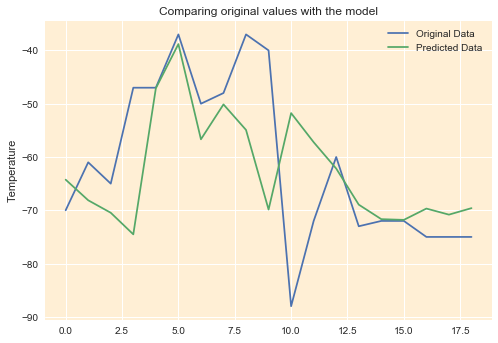

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('#FFEFD5')
plt.plot(range(19), Y_test, label = "Original Data")
plt.plot(range(19), pred, label = "Predicted Data")
plt.title('Comparing original values with the model')
plt.legend(loc='best')
plt.ylabel('Temperature')
plt.show()